C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\3391153525.py:48: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])
C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\3391153525.py:48: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])
C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\3391153525.py:48: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty item

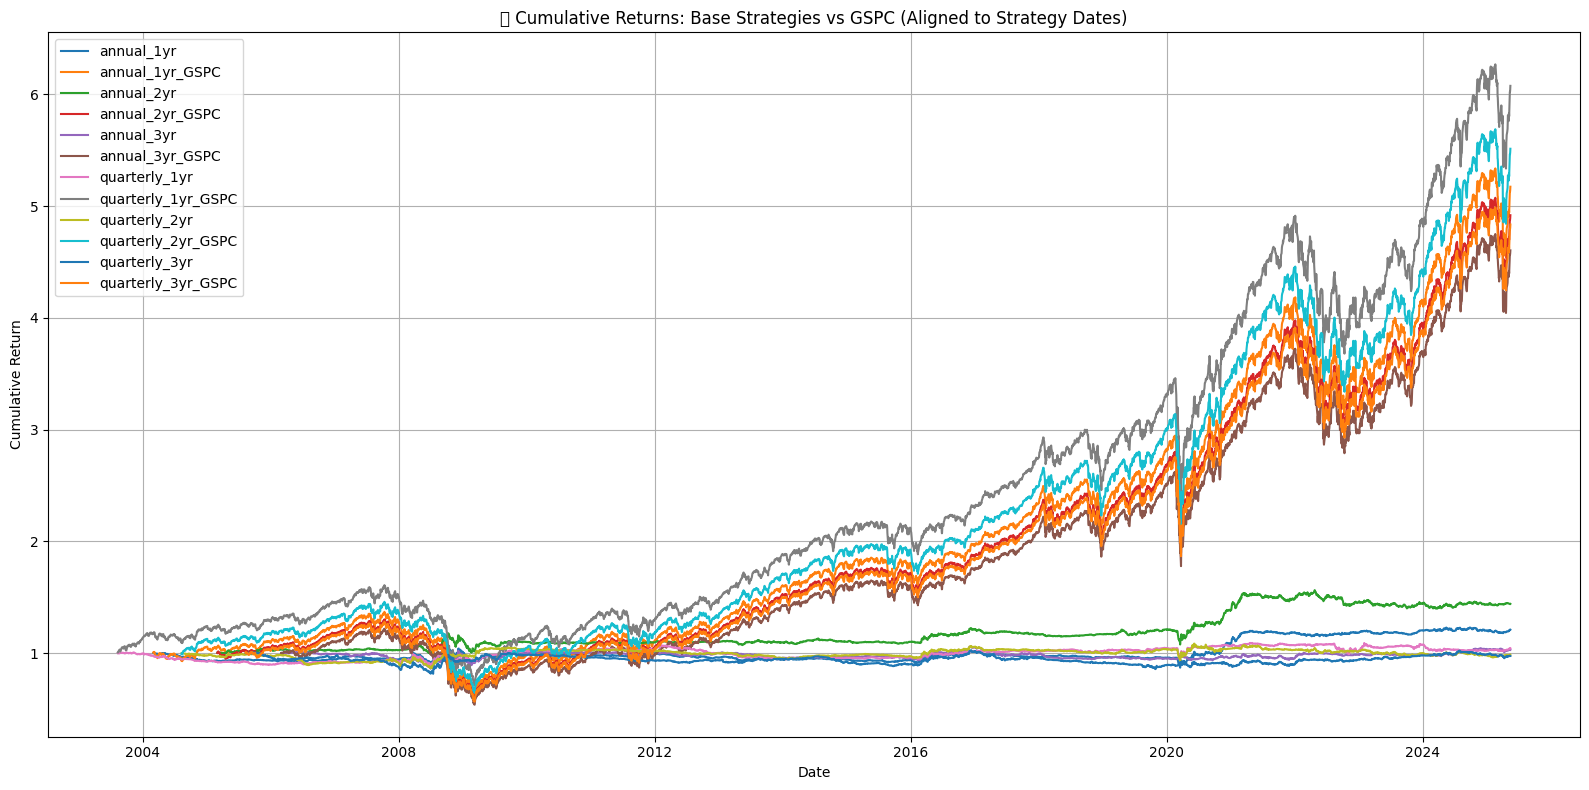

In [4]:
# 📦 Imports
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from config import PROCESSED_STOCK_CSV, PROCESSED_GSPC_CSV, BASE_STRATEGY_WEIGHTS_DIR

# 📈 Load prices
prices = pd.read_csv(PROCESSED_STOCK_CSV, index_col=0, parse_dates=True)
stock_returns = prices.pct_change().dropna(how='all')

gspc = pd.read_csv(PROCESSED_GSPC_CSV, index_col=0, parse_dates=True)
gspc_returns = gspc[gspc.columns[0]].pct_change().dropna()
gspc_returns.name = "GSPC"

# 🧮 Compute strategy returns & aligned GSPC returns
all_cumrets = {}

for fname in sorted(os.listdir(BASE_STRATEGY_WEIGHTS_DIR)):
    if not fname.endswith(".pkl"):
        continue

    path = os.path.join(BASE_STRATEGY_WEIGHTS_DIR, fname)
    with open(path, "rb") as f:
        weights_dict = pickle.load(f)

    strategy_returns = pd.Series(dtype=float)

    rebalance_dates = sorted(weights_dict.keys())
    for i in range(len(rebalance_dates)):
        start_date = pd.to_datetime(rebalance_dates[i])
        end_date = (
            pd.to_datetime(rebalance_dates[i + 1])
            if i + 1 < len(rebalance_dates)
            else stock_returns.index[-1]
        )

        returns_slice = stock_returns.loc[start_date:end_date]
        if returns_slice.empty:
            continue

        weights = weights_dict[start_date]
        common_stocks = returns_slice.columns.intersection(weights.index)
        w = weights[common_stocks]
        returns_slice = returns_slice[common_stocks]

        daily_ret = returns_slice.dot(w)
        strategy_returns = pd.concat([strategy_returns, daily_ret])

    strategy_returns = strategy_returns[~strategy_returns.index.duplicated(keep='first')]
    strategy_returns = strategy_returns.sort_index()

    # Align GSPC to strategy dates
    gspc_aligned = gspc_returns.loc[strategy_returns.index]
    gspc_cum = (1 + gspc_aligned).cumprod()

    # Store both
    label = fname.replace("base_strategy_weights_", "").replace(".pkl", "")
    all_cumrets[f"{label}"] = (1 + strategy_returns).cumprod()
    all_cumrets[f"{label}_GSPC"] = gspc_cum

# 📊 Plot cumulative returns per strategy vs benchmark
plt.figure(figsize=(16, 8))
for key, series in all_cumrets.items():
    plt.plot(series, label=key)

plt.title("📈 Cumulative Returns: Base Strategies vs GSPC (Aligned to Strategy Dates)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\1241329787.py:37: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])


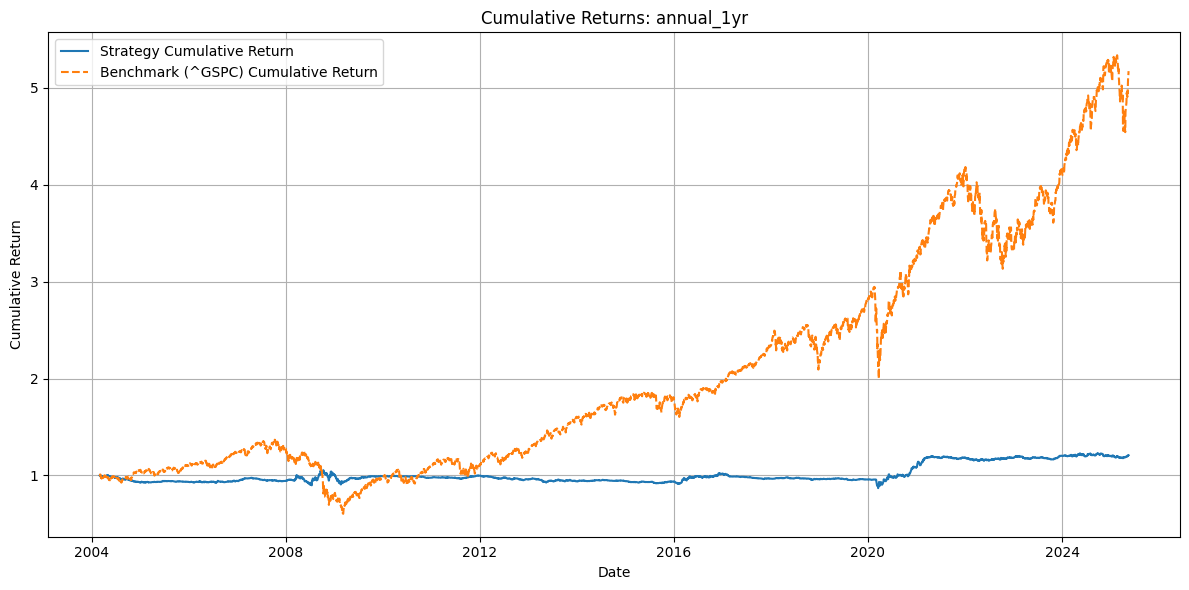

C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\1241329787.py:37: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])


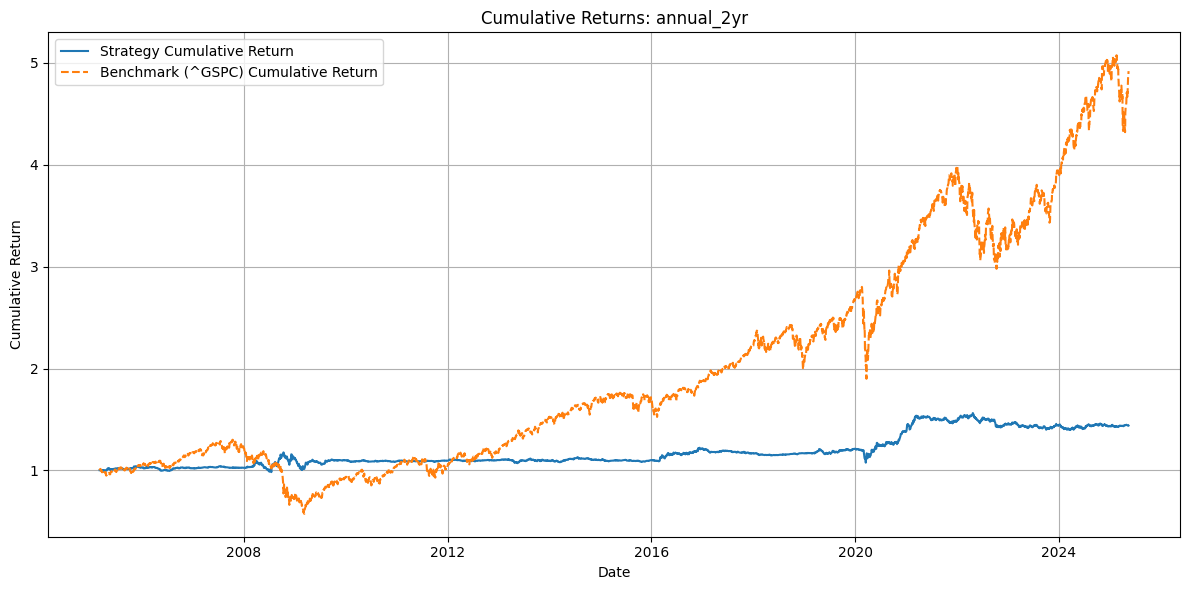

C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\1241329787.py:37: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])


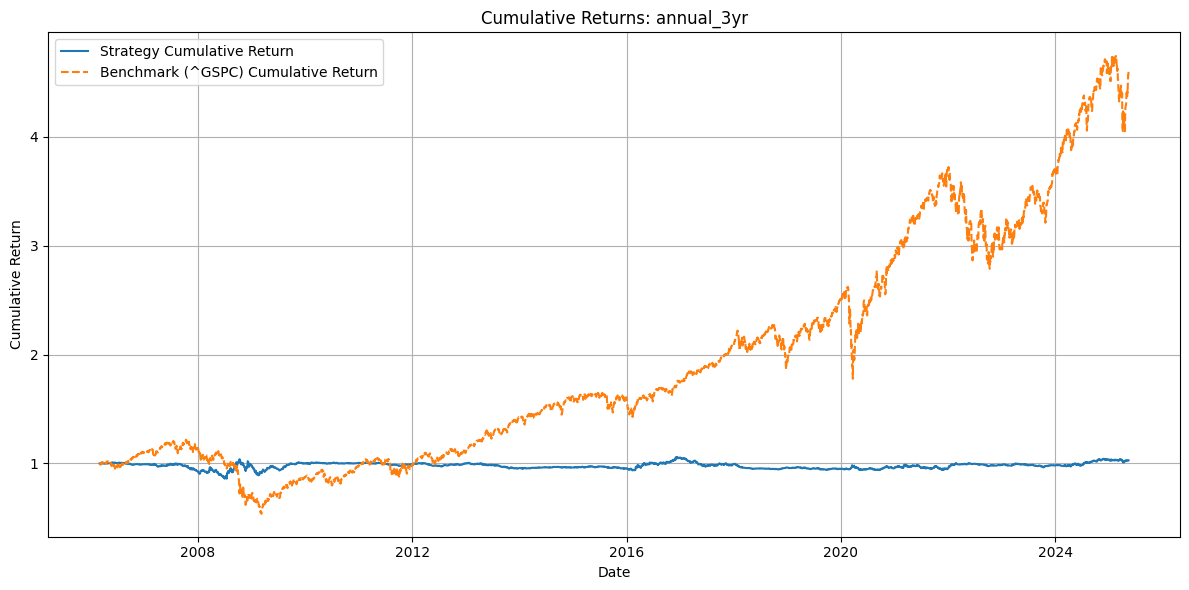

C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\1241329787.py:37: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])


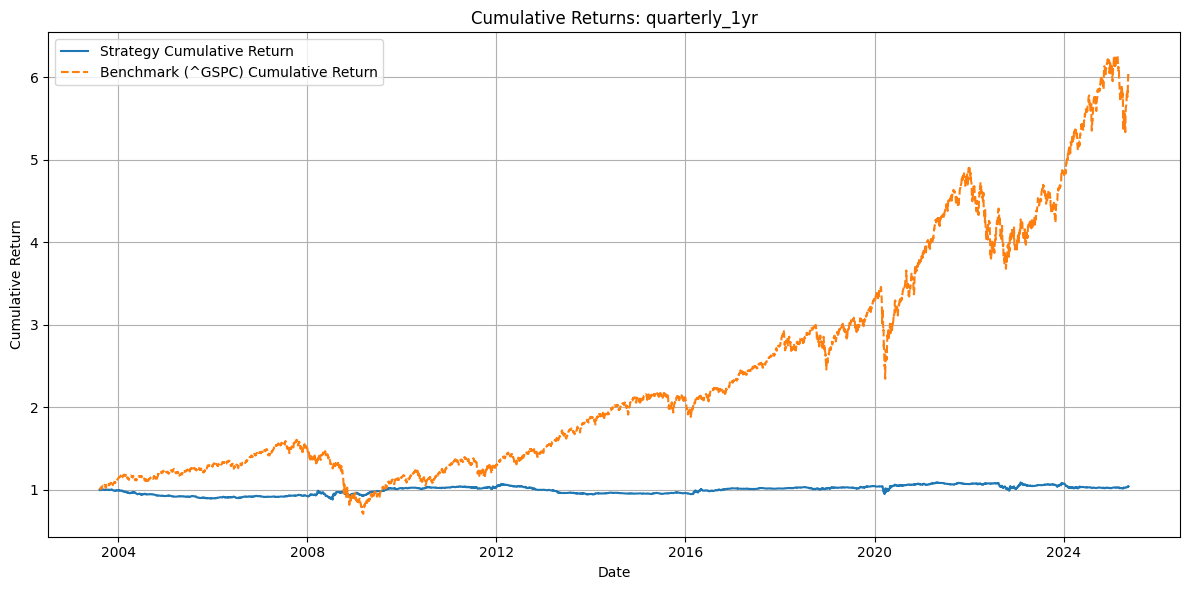

C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\1241329787.py:37: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])


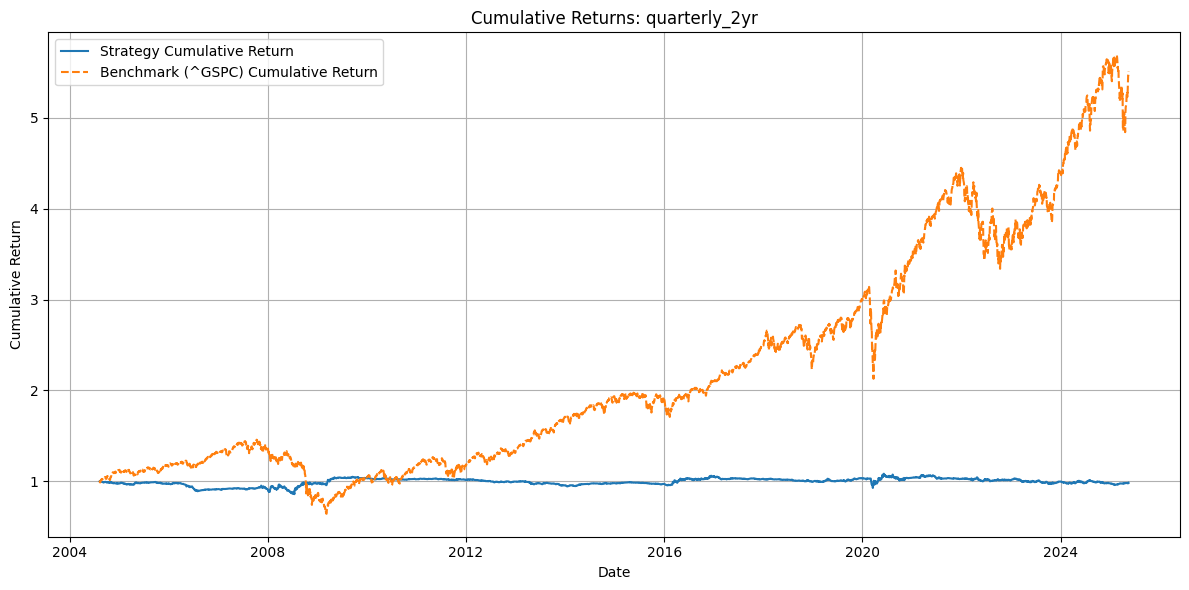

C:\Users\wweih\AppData\Local\Temp\ipykernel_27660\1241329787.py:37: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  strategy_returns = pd.concat([strategy_returns, daily_ret])


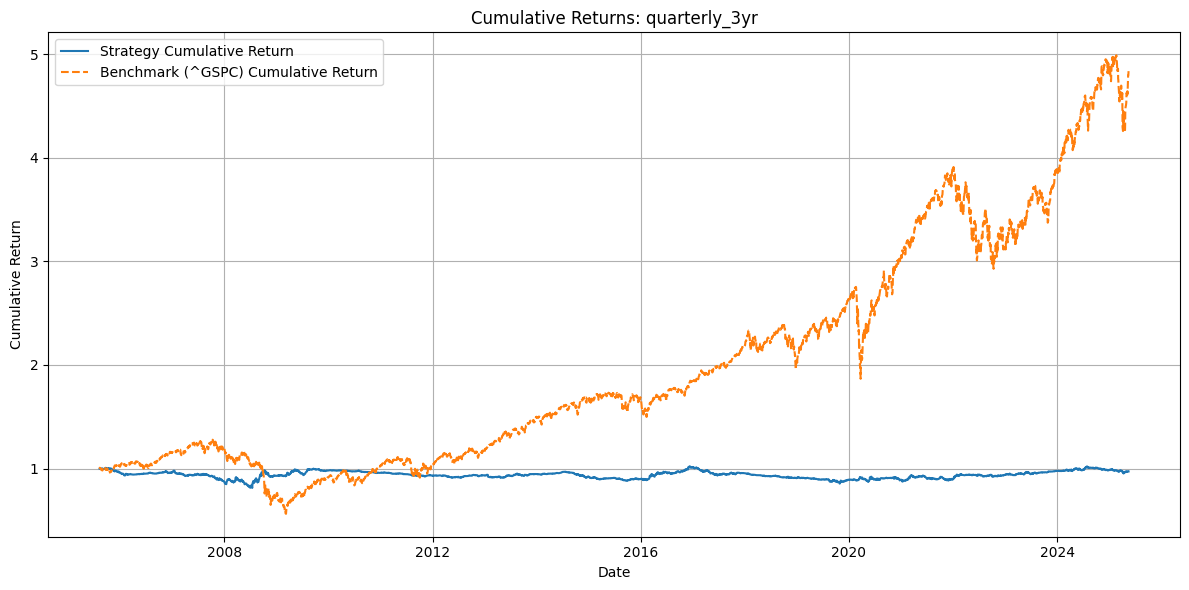

In [5]:
# Load prices and returns
prices = pd.read_csv(PROCESSED_STOCK_CSV, index_col=0, parse_dates=True)
stock_returns = prices.pct_change().dropna(how='all')

gspc = pd.read_csv(PROCESSED_GSPC_CSV, index_col=0, parse_dates=True)
gspc_returns = gspc[gspc.columns[0]].pct_change().dropna()
gspc_returns.name = "GSPC"

strategy_files = sorted([f for f in os.listdir(BASE_STRATEGY_WEIGHTS_DIR) if f.endswith(".pkl")])

for fname in strategy_files:
    path = os.path.join(BASE_STRATEGY_WEIGHTS_DIR, fname)
    with open(path, "rb") as f:
        weights_dict = pickle.load(f)

    strategy_returns = pd.Series(dtype=float)

    rebalance_dates = sorted(weights_dict.keys())
    for i in range(len(rebalance_dates)):
        start_date = pd.to_datetime(rebalance_dates[i])
        end_date = (
            pd.to_datetime(rebalance_dates[i + 1])
            if i + 1 < len(rebalance_dates)
            else stock_returns.index[-1]
        )

        returns_slice = stock_returns.loc[start_date:end_date]
        if returns_slice.empty:
            continue

        weights = weights_dict[start_date]
        common_stocks = returns_slice.columns.intersection(weights.index)
        w = weights[common_stocks]
        returns_slice = returns_slice[common_stocks]

        daily_ret = returns_slice.dot(w)
        strategy_returns = pd.concat([strategy_returns, daily_ret])

    strategy_returns = strategy_returns[~strategy_returns.index.duplicated(keep='first')]
    strategy_returns = strategy_returns.sort_index()

    # Align benchmark returns to strategy returns dates
    gspc_aligned = gspc_returns.loc[strategy_returns.index]

    # Compute cumulative returns
    strat_cumret = (1 + strategy_returns).cumprod()
    gspc_cumret = (1 + gspc_aligned).cumprod()

    # Plot individual graph
    plt.figure(figsize=(12, 6))
    plt.plot(strat_cumret, label='Strategy Cumulative Return')
    plt.plot(gspc_cumret, label='Benchmark (^GSPC) Cumulative Return', linestyle='--')
    plt.title(f"Cumulative Returns: {fname.replace('base_strategy_weights_', '').replace('.pkl','')}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()